In [1]:
# Adding DySMHO repositories to the environment
import sys
# Insert path to directory here
path_to_dysmho = '/Users/ferlejarza/Desktop/DySMHO-main/DySMHO/'
sys.path.insert(0, path_to_dysmho+'model')
sys.path.insert(0, path_to_dysmho+'data')


import model_2D
import utils
import LV_data_generation, VDP_data_generation
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import matplotlib 
from mpl_toolkits.mplot3d import Axes3D
import pickle 

font = {'size'   : 18}
matplotlib.rc('font', **font)


In [2]:
plot_data_path = path_to_dysmho+'notebook/dysmho_results/'

<Figure size 640x480 with 0 Axes>

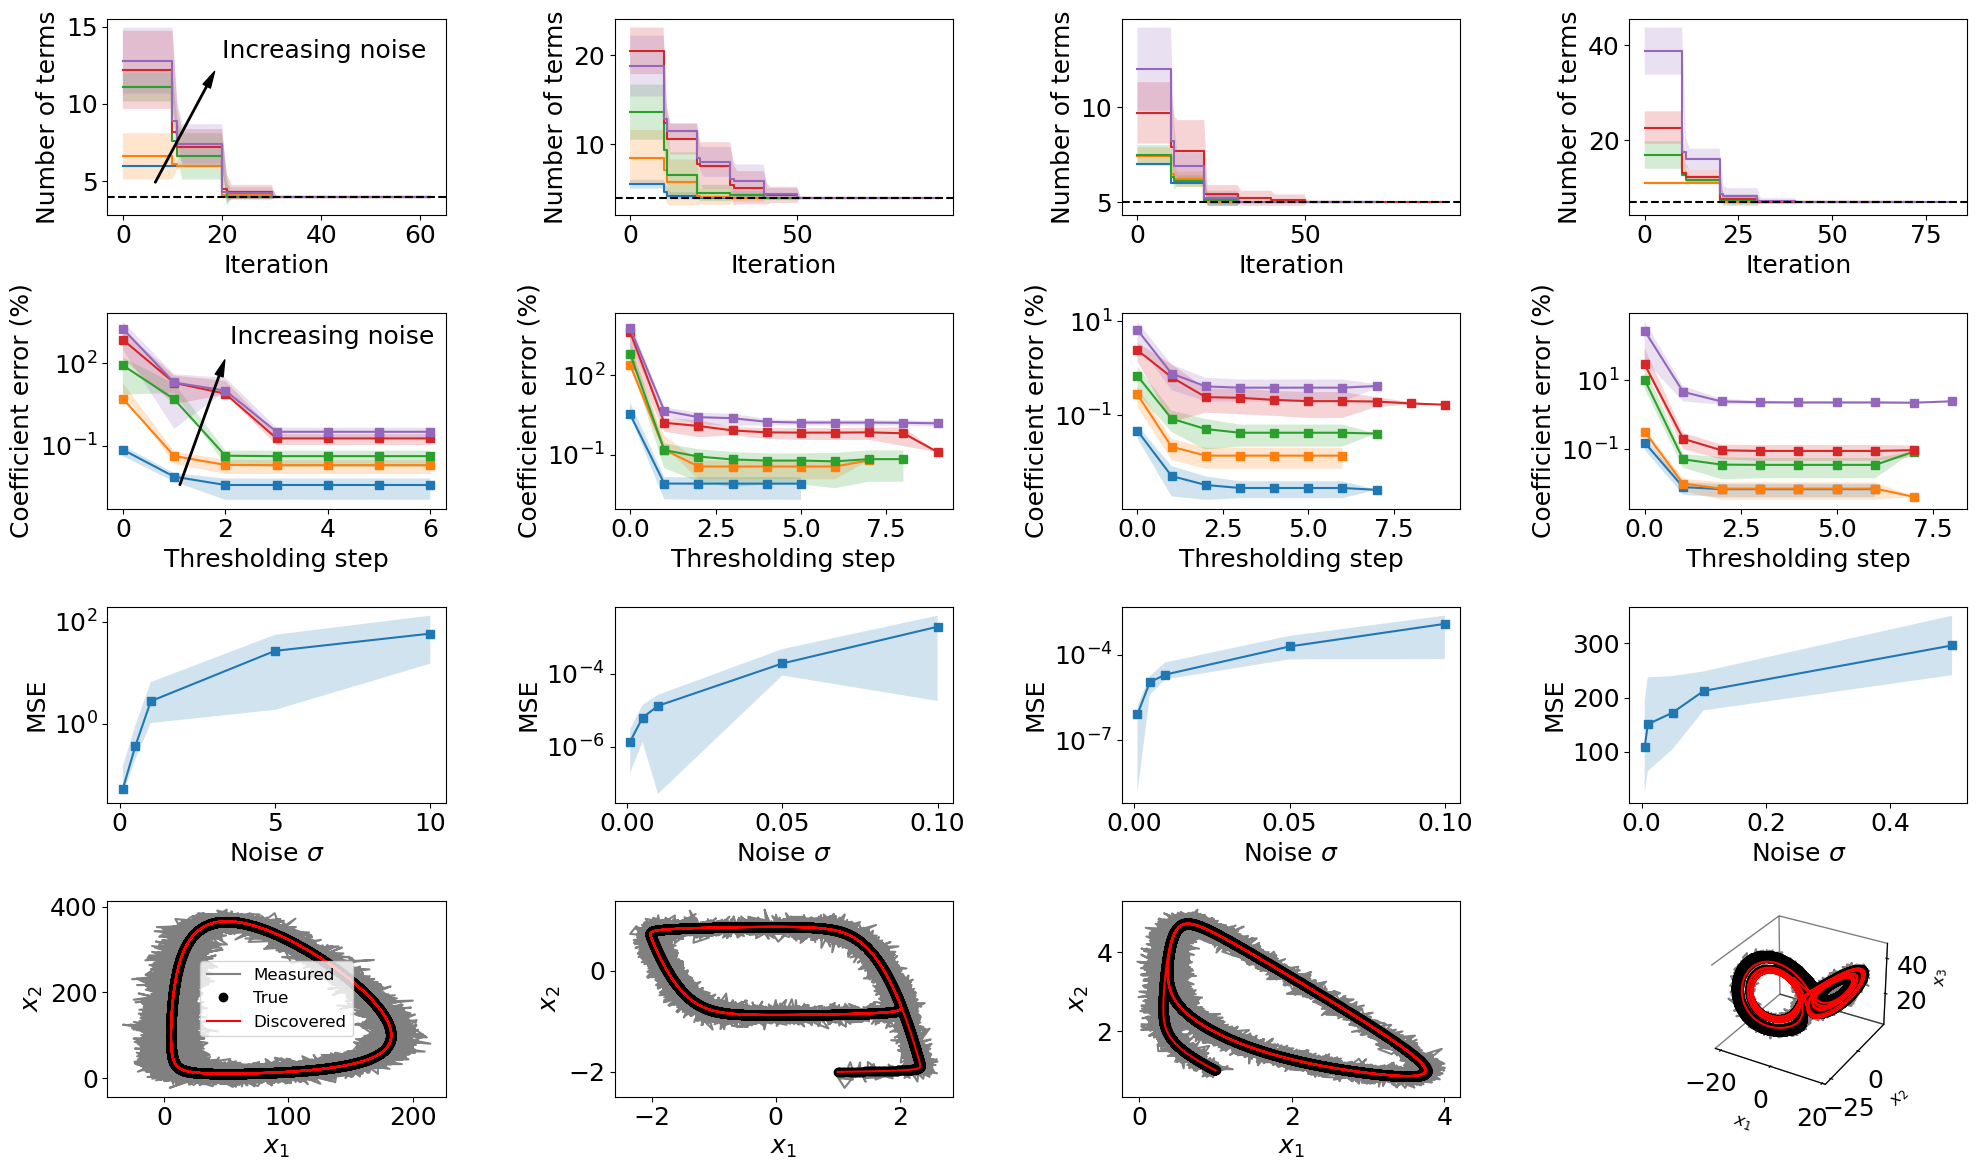

In [6]:
fig, axs = plt.subplots(4, 4, figsize = (24,14))

# LOTKA VOLTERRA 
noise_vec = [0.1,	0.5,	1,	5,	10]
mean_mse = [0.0524813076432137,	0.35781970406356,	2.76208725370615,	26.9336940697845,	58.8229510496944]
std_mse = [0.0941274300246206,	0.553220314362161,	3.78837206091462,	28.792844642632,	73.8855930892199]

param_nums = pd.DataFrame({'Pre-processing':[6,	6.6,	11.1,	12.2,	12.8]}, index = noise_vec )
param_nums_std = [0,	1.49666295470957,	0.94339811320566,	2.52190404258369,	2.13541565040626]
param_nums['Final'] = [4,	4,	4,	4,	4]
  

with open(plot_data_path+'lotka_simulated.pkl','rb') as f:
    y_simulated = pickle.load(f)
    
with open(plot_data_path+'lotka_measured.pkl','rb') as f:
    y_measured = pickle.load(f)

with open(plot_data_path+'lotka_true.pkl','rb') as f:
    y_true = pickle.load(f)


# VAN DER POL
noise_vec = [0.001,	0.005,	0.01,	0.05,	0.1]
mean_mse = [1.40833458848397E-06,	6.33978460831088E-06,	1.33241573311802E-05,	0.000191085805582674,	0.00192729927318037]
std_mse = [1.60709463272675E-06,	7.70473490431612E-06,	1.33766559200488E-05,	0.000280595366082622,	0.00194533708773222]

param_nums = pd.DataFrame({'Pre-processing':[5.5,	8.5,	13.6,	20.5,	18.8]}, index = noise_vec )
param_nums_std = [0.5,	3.85356977359953,	3.104834939252,	2.61725046566048,	3.42928563989644]
param_nums['Final'] = [4,	4,	4,	4,	4]


import pickle 
with open(plot_data_path+'van_der_pol_simulated.pkl','rb') as f:
    y_simulated = pickle.load(f)
    
with open(plot_data_path+'van_der_pol_measured.pkl','rb') as f:
    y_measured = pickle.load(f)

with open(plot_data_path+'van_der_pol_true.pkl','rb') as f:
    y_true = pickle.load(f)

# True coefficients 
true_coeff = [0 for i in range(28)]
true_coeff[0] = 5 ; true_coeff[1] = -5; true_coeff[7] = -5/3 ; true_coeff[14] = -0.2
sum_coeff = sum(np.abs(true_coeff))*0.01



# BRUSSELATOR 
noise_vec = [0.001,	0.005,	0.01,	0.05,	0.1]
mean_mse = [8.00557886113187E-07,	1.06802480995206E-05,	1.98199162983521E-05,	0.000191698079181117,	0.0011885176431112]
std_mse = [7.99247873656048E-07,	6.85196721200725E-06,	3.32540670616586E-05,	0.000259033971608392,	0.00111947184286488]

param_nums = pd.DataFrame({'Pre-processing':[7,	7.4,	7.5,	9.7,	12]}, index = noise_vec )
param_nums_std = [0,	0.489897948556635,	0.5,	1.61554944214035,	2.19089023002066]
param_nums['Final'] = [5,5,5,5,5]
 
with open(plot_data_path+'brusselator_discovered.pkl','rb') as f:
    y_simulated = pickle.load(f)
    
with open(plot_data_path+'brusselator_measured.pkl','rb') as f:
    y_measured = pickle.load(f)

with open(plot_data_path+'brusselator_true.pkl','rb') as f:
    y_true = pickle.load(f)


# LORENZ
noise_vec = [0.005,	0.01,	0.05,	0.1,	0.5]
mean_mse = [108.185420034004,	150.61394218087,	172.180265934423,	212.264618500333,	296.347173560822]
std_mse = [86.1653631068622,	86.6422806564137,	67.6549997784222,	36.0738034472883,	55.0603743532534]

param_nums = pd.DataFrame({'Pre-processing':[11,	11,	16.9,	22.7,	38.8]}, index = noise_vec )
param_nums_std = [0,	0,	2.87923600977759,	3.40734500748016,	4.95580467734554]
param_nums['Final'] = [7,7,7,7,7]


with open(plot_data_path+'lorenz_discovered.pkl','rb') as f:
    y_simulated = pickle.load(f)
    
with open(plot_data_path+'lorenz_measured.pkl','rb') as f:
    y_measured = pickle.load(f)

with open(plot_data_path+'lorenz_true.pkl','rb') as f:
    y_true = pickle.load(f)



# LOTKA-VOLTERRA 
avg_number_of_terms1 = [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
std_number_of_terms1 = [0 for i in range(len(avg_number_of_terms1))]
avg_number_of_terms2 = [6.600000000000001, 6.600000000000001, 6.600000000000001, 6.600000000000001, 6.600000000000001, 6.600000000000001, 6.600000000000001, 6.600000000000001, 6.600000000000001, 6.600000000000001, 6.600000000000001, 6.100000000000001, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 4.100000000000001, 4.100000000000001, 4.100000000000001, 4.100000000000001, 4.100000000000001, 4.100000000000001, 4.100000000000001, 4.100000000000001, 4.100000000000001, 4.100000000000001, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
std_number_of_terms2 = [1.4966629547095767, 1.4966629547095767, 1.4966629547095767, 1.4966629547095767, 1.4966629547095767, 1.4966629547095767, 1.4966629547095767, 1.4966629547095767, 1.4966629547095767, 1.4966629547095767, 1.4966629547095767, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
avg_number_of_terms3 = [11.100000000000001, 11.100000000000001, 11.100000000000001, 11.100000000000001, 11.100000000000001, 11.100000000000001, 11.100000000000001, 11.100000000000001, 11.100000000000001, 11.100000000000001, 11.100000000000001, 7.600000000000001, 6.600000000000001, 6.600000000000001, 6.600000000000001, 6.600000000000001, 6.600000000000001, 6.600000000000001, 6.600000000000001, 6.600000000000001, 6.600000000000001, 4.300000000000001, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
std_number_of_terms3 = [0.9433981132056604, 0.9433981132056604, 0.9433981132056604, 0.9433981132056604, 0.9433981132056604, 0.9433981132056604, 0.9433981132056604, 0.9433981132056604, 0.9433981132056604, 0.9433981132056604, 0.9433981132056604, 1.2, 1.4966629547095767, 1.4966629547095767, 1.4966629547095767, 1.4966629547095767, 1.4966629547095767, 1.4966629547095767, 1.4966629547095767, 1.4966629547095767, 1.4966629547095767, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
avg_number_of_terms4 = [12.2, 12.2, 12.2, 12.2, 12.2, 12.2, 12.2, 12.2, 12.2, 12.2, 12.2, 8.2, 7.199999999999999, 7.199999999999999, 7.199999999999999, 7.199999999999999, 7.199999999999999, 7.199999999999999, 7.199999999999999, 7.199999999999999, 7.199999999999999, 4.5, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
std_number_of_terms4 = [2.5219040425836985, 2.5219040425836985, 2.5219040425836985, 2.5219040425836985, 2.5219040425836985, 2.5219040425836985, 2.5219040425836985, 2.5219040425836985, 2.5219040425836985, 2.5219040425836985, 2.5219040425836985, 1.4696938456699067, 1.1661903789690602, 1.1661903789690602, 1.1661903789690602, 1.1661903789690602, 1.1661903789690602, 1.1661903789690602, 1.1661903789690602, 1.1661903789690602, 1.1661903789690602, 0.9219544457292888, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
avg_number_of_terms5 = [12.8, 12.8, 12.8, 12.8, 12.8, 12.8, 12.8, 12.8, 12.8, 12.8, 12.8, 8.899999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 4.300000000000001, 4.199999999999999, 4.199999999999999, 4.199999999999999, 4.199999999999999, 4.199999999999999, 4.199999999999999, 4.199999999999999, 4.199999999999999, 4.199999999999999, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
std_number_of_terms5 = [2.1354156504062622, 2.1354156504062622, 2.1354156504062622, 2.1354156504062622, 2.1354156504062622, 2.1354156504062622, 2.1354156504062622, 2.1354156504062622, 2.1354156504062622, 2.1354156504062622, 2.1354156504062622, 1.3000000000000003, 1.2806248474865698, 1.2806248474865698, 1.2806248474865698, 1.2806248474865698, 1.2806248474865698, 1.2806248474865698, 1.2806248474865698, 1.2806248474865698, 1.2806248474865698, 0.45825756949558394, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


ax = axs[0,0]
ax.step([i for i in range(len(avg_number_of_terms1))],avg_number_of_terms1)
ax.fill_between([i for i in range(len(avg_number_of_terms1))],
                [abs(j-std_number_of_terms1[i]) for i,j in enumerate(avg_number_of_terms1)],
                [j+std_number_of_terms1[i] for i,j in enumerate(avg_number_of_terms1)], alpha = 0.2)

ax.step([i for i in range(len(avg_number_of_terms2))],avg_number_of_terms2)
ax.fill_between([i for i in range(len(avg_number_of_terms2))],
                [abs(j-std_number_of_terms2[i]) for i,j in enumerate(avg_number_of_terms2)],
                [j+std_number_of_terms2[i] for i,j in enumerate(avg_number_of_terms2)], alpha = 0.2)

ax.step([i for i in range(len(avg_number_of_terms3))],avg_number_of_terms3)
ax.fill_between([i for i in range(len(avg_number_of_terms3))],
                [abs(j-std_number_of_terms3[i]) for i,j in enumerate(avg_number_of_terms3)],
                [j+std_number_of_terms3[i] for i,j in enumerate(avg_number_of_terms3)], alpha = 0.2)

ax.step([i for i in range(len(avg_number_of_terms4))],avg_number_of_terms4)
ax.fill_between([i for i in range(len(avg_number_of_terms4))],
                [abs(j-std_number_of_terms4[i]) for i,j in enumerate(avg_number_of_terms4)],
                [j+std_number_of_terms4[i] for i,j in enumerate(avg_number_of_terms4)], alpha = 0.2)

ax.step([i for i in range(len(avg_number_of_terms5))],avg_number_of_terms5)
ax.fill_between([i for i in range(len(avg_number_of_terms5))],
                [abs(j-std_number_of_terms5[i]) for i,j in enumerate(avg_number_of_terms5)],
                [j+std_number_of_terms5[i] for i,j in enumerate(avg_number_of_terms5)], alpha = 0.2)
ax.annotate('', xy=(20, 13), xytext=(5, 4), 
            arrowprops=dict(facecolor='black', shrink=0.1, width = 1, headwidth = 6),)
ax.annotate('Increasing noise', xy=(20, 13))
ax.axhline(y=4, color = 'k', linestyle = '--')
ax.set_xlabel('Iteration')
ax.set_ylabel('Number of terms')


avg_coeff_error1 = [0.07192421637171764, 0.007524264892490501, 0.003741279407503089, 0.003741279407503089, 0.003741279407503089, 0.003741279407503089, 0.003741279407503089]
std_coeff_error1 = [0.02973386849019041, 0.002613499966018752, 0.0026614329290623436, 0.0026614329290623436, 0.0026614329290623436, 0.0026614329290623436, 0.0026614329290623436]

avg_coeff_error2 = [5.197337632734591, 0.042522859142184705, 0.02013936321910515, 0.019698440894398934, 0.019698440894398934, 0.019698440894398934, 0.019698440894398934]
std_coeff_error2 = [14.059760283488496, 0.020773613539521986, 0.010770747565073607, 0.01025861446276341, 0.01025861446276341, 0.01025861446276341, 0.01025861446276341]


avg_coeff_error3 = [84.9162819884925, 5.016107702371008, 0.04341988314462074, 0.04197516847705375, 0.04197516847705375, 0.04197516847705375, 0.04197516847705375]
std_coeff_error3 = [77.65753614822016, 13.537399057161075, 0.023716833713104374, 0.024917852752726836, 0.024917852752726836, 0.024917852752726836, 0.024917852752726836]


avg_coeff_error4 = [729.8891025317095, 19.658072142054266, 7.889976787589352, 0.18530350915538654, 0.18530350915538654, 0.18530350915538654, 0.18530350915538654]
std_coeff_error4 = [878.3649807923102, 16.428726980501033, 15.259454118693467, 0.07873648818228905, 0.07873648818228905, 0.07873648818228905, 0.07873648818228905]

avg_coeff_error5 = [1814.9824175241297, 20.203174877087086, 10.177786587776563, 0.3236635422492044, 0.3236635422492044, 0.3236635422492044, 0.3236635422492044]
std_coeff_error5 = [1496.0987145877177, 19.789850771010666, 19.760173300623077, 0.133936230221972, 0.133936230221972, 0.133936230221972, 0.133936230221972]


ax = axs[1,0]
ax.plot([i for i in range(len(avg_coeff_error1))],avg_coeff_error1,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error1))],
                [abs(j-std_coeff_error1[i]) for i,j in enumerate(avg_coeff_error1)],
                [j+std_coeff_error1[i] for i,j in enumerate(avg_coeff_error1)], alpha = 0.2)

ax.plot([i for i in range(len(avg_coeff_error2))],avg_coeff_error2,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error2))],
                [abs(j-std_coeff_error2[i]) for i,j in enumerate(avg_coeff_error2)],
                [j+std_coeff_error2[i] for i,j in enumerate(avg_coeff_error2)], alpha = 0.2)

ax.plot([i for i in range(len(avg_coeff_error3))],avg_coeff_error3,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error3))],
                [abs(j-std_coeff_error3[i]) for i,j in enumerate(avg_coeff_error3)],
                [j+std_coeff_error3[i] for i,j in enumerate(avg_coeff_error3)], alpha = 0.2)

ax.plot([i for i in range(len(avg_coeff_error4))],avg_coeff_error4,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error4))],
                [abs(j-std_coeff_error4[i]) for i,j in enumerate(avg_coeff_error4)],
                [j+std_coeff_error4[i] for i,j in enumerate(avg_coeff_error4)], alpha = 0.2)

ax.plot([i for i in range(len(avg_coeff_error5))],avg_coeff_error5,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error5))],
                [abs(j-std_coeff_error5[i]) for i,j in enumerate(avg_coeff_error5)],
                [j+std_coeff_error5[i] for i,j in enumerate(avg_coeff_error5)], alpha = 0.2)
ax.annotate('', xy=(2.1, 5e2), xytext=(1, 10e-4), 
            arrowprops=dict(facecolor='black', shrink=0.1, width = 1, headwidth = 6),)
ax.annotate('Increasing noise', xy=(2.1, 5e2))
ax.set_xlabel('Thresholding step')
ax.set_ylabel('Coefficient error (%)')
ax.set_yscale('log')



# VAN DER POL  
avg_number_of_terms1 = [5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 4.600000000000001, 4.199999999999999, 4.199999999999999, 4.199999999999999, 4.199999999999999, 4.199999999999999, 4.199999999999999, 4.199999999999999, 4.199999999999999, 4.199999999999999, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
std_number_of_terms1 = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.66332495807108, 0.39999999999999997, 0.39999999999999997, 0.39999999999999997, 0.39999999999999997, 0.39999999999999997, 0.39999999999999997, 0.39999999999999997, 0.39999999999999997, 0.39999999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

avg_number_of_terms2 = [8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 7.100000000000001, 5.699999999999999, 5.699999999999999, 5.699999999999999, 5.699999999999999, 5.699999999999999, 5.699999999999999, 5.699999999999999, 5.699999999999999, 5.699999999999999, 4.199999999999999, 4.100000000000001, 4.100000000000001, 4.100000000000001, 4.100000000000001, 4.100000000000001, 4.100000000000001, 4.100000000000001, 4.100000000000001, 4.100000000000001, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
std_number_of_terms2 = [3.104834939252005, 3.104834939252005, 3.104834939252005, 3.104834939252005, 3.104834939252005, 3.104834939252005, 3.104834939252005, 3.104834939252005, 3.104834939252005, 3.104834939252005, 3.104834939252005, 3.7429934544425802, 2.5787593916455256, 2.5787593916455256, 2.5787593916455256, 2.5787593916455256, 2.5787593916455256, 2.5787593916455256, 2.5787593916455256, 2.5787593916455256, 2.5787593916455256, 0.9219544457292888, 0.9219544457292888, 0.9219544457292888, 0.9219544457292888, 0.9219544457292888, 0.9219544457292888, 0.9219544457292888, 0.9219544457292888, 0.9219544457292888, 0.9219544457292888, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

avg_number_of_terms3 = [13.6, 13.6, 13.6, 13.6, 13.6, 13.6, 13.6, 13.6, 13.6, 13.6, 13.6, 9.3, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
std_number_of_terms3 = [3.104834939252005, 3.104834939252005, 3.104834939252005, 3.104834939252005, 3.104834939252005, 3.104834939252005, 3.104834939252005, 3.104834939252005, 3.104834939252005, 3.104834939252005, 3.104834939252005, 3.7429934544425802, 2.5787593916455256, 2.5787593916455256, 2.5787593916455256, 2.5787593916455256, 2.5787593916455256, 2.5787593916455256, 2.5787593916455256, 2.5787593916455256, 2.5787593916455256, 0.9219544457292888, 0.9219544457292888, 0.9219544457292888, 0.9219544457292888, 0.9219544457292888, 0.9219544457292888, 0.9219544457292888, 0.9219544457292888, 0.9219544457292888, 0.9219544457292888, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.45825756949558394, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

avg_number_of_terms4 = [20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 12.4, 10.600000000000001, 10.600000000000001, 10.600000000000001, 10.600000000000001, 10.600000000000001, 10.600000000000001, 10.600000000000001, 10.600000000000001, 10.600000000000001, 7.800000000000001, 7.600000000000001, 7.600000000000001, 7.600000000000001, 7.600000000000001, 7.600000000000001, 7.600000000000001, 7.600000000000001, 7.600000000000001, 7.600000000000001, 5.399999999999999, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 4.399999999999999, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.300000000000001, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
std_number_of_terms4 = [2.6172504656604803, 2.6172504656604803, 2.6172504656604803, 2.6172504656604803, 2.6172504656604803, 2.6172504656604803, 2.6172504656604803, 2.6172504656604803, 2.6172504656604803, 2.6172504656604803, 2.6172504656604803, 1.7435595774162693, 1.7435595774162693, 1.7435595774162693, 1.7435595774162693, 1.7435595774162693, 1.7435595774162693, 1.7435595774162693, 1.7435595774162693, 1.7435595774162693, 1.7435595774162693, 2.4, 2.6153393661244038, 2.6153393661244038, 2.6153393661244038, 2.6153393661244038, 2.6153393661244038, 2.6153393661244038, 2.6153393661244038, 2.6153393661244038, 2.6153393661244038, 2.3323807579381204, 1.8681541692269406, 1.8681541692269406, 1.8681541692269406, 1.8681541692269406, 1.8681541692269406, 1.8681541692269406, 1.8681541692269406, 1.8681541692269406, 1.8681541692269406, 1.2, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


avg_number_of_terms5 = [18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 12.8, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 8.399999999999999, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 6.100000000000001, 5.899999999999999, 5.899999999999999, 5.899999999999999, 5.899999999999999, 5.899999999999999, 5.899999999999999, 5.899999999999999, 5.899999999999999, 5.899999999999999, 4.399999999999999, 4.399999999999999, 4.399999999999999, 4.399999999999999, 4.399999999999999, 4.399999999999999, 4.399999999999999, 4.399999999999999, 4.399999999999999, 4.399999999999999, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
std_number_of_terms5 = [3.4292856398964493, 3.4292856398964493, 3.4292856398964493, 3.4292856398964493, 3.4292856398964493, 3.4292856398964493, 3.4292856398964493, 3.4292856398964493, 3.4292856398964493, 3.4292856398964493, 3.4292856398964493, 1.469693845669907, 0.806225774829855, 0.806225774829855, 0.806225774829855, 0.806225774829855, 0.806225774829855, 0.806225774829855, 0.806225774829855, 0.806225774829855, 0.806225774829855, 1.3564659966250538, 1.6733200530681511, 1.6733200530681511, 1.6733200530681511, 1.6733200530681511, 1.6733200530681511, 1.6733200530681511, 1.6733200530681511, 1.6733200530681511, 1.6733200530681511, 1.8138357147217052, 1.8138357147217055, 1.8138357147217055, 1.8138357147217055, 1.8138357147217055, 1.8138357147217055, 1.8138357147217055, 1.8138357147217055, 1.8138357147217055, 1.8138357147217055, 0.66332495807108, 0.66332495807108, 0.66332495807108, 0.66332495807108, 0.66332495807108, 0.66332495807108, 0.66332495807108, 0.66332495807108, 0.66332495807108, 0.66332495807108, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


ax = axs[0,1]
ax.step([i for i in range(len(avg_number_of_terms1))],avg_number_of_terms1)
ax.fill_between([i for i in range(len(avg_number_of_terms1))],
                [abs(j-std_number_of_terms1[i]) for i,j in enumerate(avg_number_of_terms1)],
                [j+std_number_of_terms1[i] for i,j in enumerate(avg_number_of_terms1)], alpha = 0.2)

ax.step([i for i in range(len(avg_number_of_terms2))],avg_number_of_terms2)
ax.fill_between([i for i in range(len(avg_number_of_terms2))],
                [abs(j-std_number_of_terms2[i]) for i,j in enumerate(avg_number_of_terms2)],
                [j+std_number_of_terms2[i] for i,j in enumerate(avg_number_of_terms2)], alpha = 0.2)

ax.step([i for i in range(len(avg_number_of_terms3))],avg_number_of_terms3)
ax.fill_between([i for i in range(len(avg_number_of_terms3))],
                [abs(j-std_number_of_terms3[i]) for i,j in enumerate(avg_number_of_terms3)],
                [j+std_number_of_terms3[i] for i,j in enumerate(avg_number_of_terms3)], alpha = 0.2)

ax.step([i for i in range(len(avg_number_of_terms4))],avg_number_of_terms4)
ax.fill_between([i for i in range(len(avg_number_of_terms4))],
                [abs(j-std_number_of_terms4[i]) for i,j in enumerate(avg_number_of_terms4)],
                [j+std_number_of_terms4[i] for i,j in enumerate(avg_number_of_terms4)], alpha = 0.2)

ax.step([i for i in range(len(avg_number_of_terms5))],avg_number_of_terms5)
ax.fill_between([i for i in range(len(avg_number_of_terms5))],
                [abs(j-std_number_of_terms5[i]) for i,j in enumerate(avg_number_of_terms5)],
                [j+std_number_of_terms5[i] for i,j in enumerate(avg_number_of_terms5)], alpha = 0.2)
ax.axhline(y=4, color = 'k', linestyle = '--')
ax.set_xlabel('Iteration')
ax.set_ylabel('Number of terms')


avg_coeff_error1 = [6.748577811537002, 3.379089208116252, 3.379024687649438, 3.379024687649438, 3.379024687649438, 3.379024687649438]
avg_coeff_error1 = [i-2*1.6853932584269666 for i in avg_coeff_error1]
std_coeff_error1 = [6.233982616009857, 0.006181857528916202, 0.006219851108794134, 0.006219851108794134, 0.006219851108794134, 0.006219851108794134]


avg_coeff_error2 = [252.2306228127261, 3.5277383141746035, 3.4072365680277263, 3.4072116826363574, 3.4072116826363574, 3.4072116826363574, 3.4072116826363574, 3.433538866001652]
avg_coeff_error2 = [i-2*1.6853932584269666 for i in avg_coeff_error2]
std_coeff_error2 = [463.80302295831245, 0.3669759940842194, 0.024485557604617684, 0.024460263150302326, 0.024460263150302326, 0.024460263150302326, 0.024460263150302326, 0.0]


avg_coeff_error3 = [664.8398453328671, 3.522650818915556, 3.4574187987235305, 3.438236669009517, 3.4319332123546653, 3.4319332123546653, 3.428053183015518, 3.440028785727447, 3.440028785727447]
avg_coeff_error3 = [i-2*1.6853932584269666 for i in avg_coeff_error3]
std_coeff_error3 = [998.8598016167108, 0.12042650256620725, 0.0769326108433381, 0.06140591943542448, 0.05346965901580929, 0.05346965901580929, 0.06277101016563559, 0.079021637956457, 0.079021637956457]


avg_coeff_error4 = [4324.609433479821, 5.003699593123102, 4.608728116983597, 4.210441297078383, 4.07970376266393, 4.065198417983376, 4.065198417983376, 4.080975642552145, 4.02736313231989, 3.4987621897242174]
avg_coeff_error4 = [i-2*1.6853932584269666 for i in avg_coeff_error4]
std_coeff_error4 = [3804.4938561994004, 0.8761579395073534, 0.7726556713310321, 0.2876826085227609, 0.30509216882761736, 0.328055318082375, 0.328055318082375, 0.3421825445029915, 0.4418243582865459, 0.0]

avg_coeff_error5 = [6115.796567893843, 4.629884769907757, 2.6643549967700553, 2.4336806469741603, 1.7820190761090118, 1.6671930783577995, 1.6671930783577995, 1.6671930783577995, 1.6331103653455397, 1.5589092805017728]
std_coeff_error5 = [4648.5845968914, 1.7313304489639691, 1.2149164236512138, 1.1881038353046915, 0.46660555125499664, 0.3843720843896363, 0.3843720843896363, 0.3843720843896363, 0.3626664502582403, 0.38268706952042464]


ax = axs[1,1]
ax.plot([i for i in range(len(avg_coeff_error1))],avg_coeff_error1,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error1))],
                [abs(j-std_coeff_error1[i]) for i,j in enumerate(avg_coeff_error1)],
                [j+std_coeff_error1[i] for i,j in enumerate(avg_coeff_error1)], alpha = 0.2)

ax.plot([i for i in range(len(avg_coeff_error2))],avg_coeff_error2,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error2))],
                [abs(j-std_coeff_error2[i]) for i,j in enumerate(avg_coeff_error2)],
                [j+std_coeff_error2[i] for i,j in enumerate(avg_coeff_error2)], alpha = 0.2)

ax.plot([i for i in range(len(avg_coeff_error3))],avg_coeff_error3,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error3))],
                [abs(j-std_coeff_error3[i]) for i,j in enumerate(avg_coeff_error3)],
                [j+std_coeff_error3[i] for i,j in enumerate(avg_coeff_error3)], alpha = 0.2)

ax.plot([i for i in range(len(avg_coeff_error4))],avg_coeff_error4,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error4))],
                [abs(j-std_coeff_error4[i]) for i,j in enumerate(avg_coeff_error4)],
                [j+std_coeff_error4[i] for i,j in enumerate(avg_coeff_error4)], alpha = 0.2)

ax.plot([i for i in range(len(avg_coeff_error5))],avg_coeff_error5,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error5))],
                [abs(j-std_coeff_error5[i]) for i,j in enumerate(avg_coeff_error5)],
                [j+std_coeff_error5[i] for i,j in enumerate(avg_coeff_error5)], alpha = 0.2)
ax.set_xlabel('Thresholding step')
ax.set_ylabel('Coefficient error (%)')
ax.set_yscale('log')



#BRUSSELATOR
avg_number_of_terms1 = [7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
std_number_of_terms1 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


avg_number_of_terms2 = [7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 6.5, 6.199999999999999, 6.199999999999999, 6.199999999999999, 6.199999999999999, 6.199999999999999, 6.199999999999999, 6.199999999999999, 6.199999999999999, 6.199999999999999, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
std_number_of_terms2 =  [0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

avg_number_of_terms3 = [7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 6.300000000000001, 6.100000000000001, 6.100000000000001, 6.100000000000001, 6.100000000000001, 6.100000000000001, 6.100000000000001, 6.100000000000001, 6.100000000000001, 6.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
std_number_of_terms3 =  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6403124237432849, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

avg_number_of_terms4 = [9.7, 9.7, 9.7, 9.7, 9.7, 9.7, 9.7, 9.7, 9.7, 9.7, 9.7, 7.899999999999999, 7.699999999999999, 7.699999999999999, 7.699999999999999, 7.699999999999999, 7.699999999999999, 7.699999999999999, 7.699999999999999, 7.699999999999999, 7.699999999999999, 5.399999999999999, 5.399999999999999, 5.399999999999999, 5.399999999999999, 5.399999999999999, 5.399999999999999, 5.399999999999999, 5.399999999999999, 5.399999999999999, 5.399999999999999, 5.199999999999999, 5.199999999999999, 5.199999999999999, 5.199999999999999, 5.199999999999999, 5.199999999999999, 5.199999999999999, 5.199999999999999, 5.199999999999999, 5.199999999999999, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.100000000000001, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
std_number_of_terms4 = [1.6155494421403513, 1.6155494421403513, 1.6155494421403513, 1.6155494421403513, 1.6155494421403513, 1.6155494421403513, 1.6155494421403513, 1.6155494421403513, 1.6155494421403513, 1.6155494421403513, 1.6155494421403513, 1.6401219466856727, 1.6155494421403511, 1.6155494421403511, 1.6155494421403511, 1.6155494421403511, 1.6155494421403511, 1.6155494421403511, 1.6155494421403511, 1.6155494421403511, 1.6155494421403511, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.39999999999999997, 0.39999999999999997, 0.39999999999999997, 0.39999999999999997, 0.39999999999999997, 0.39999999999999997, 0.39999999999999997, 0.39999999999999997, 0.39999999999999997, 0.39999999999999997, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

avg_number_of_terms5 = [12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 8.2, 6.899999999999999, 6.899999999999999, 6.899999999999999, 6.899999999999999, 6.899999999999999, 6.899999999999999, 6.899999999999999, 6.899999999999999, 6.899999999999999, 5.199999999999999, 5.199999999999999, 5.199999999999999, 5.199999999999999, 5.199999999999999, 5.199999999999999, 5.199999999999999, 5.199999999999999, 5.199999999999999, 5.199999999999999, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
std_number_of_terms5 = [2.1908902300206643, 2.1908902300206643, 2.1908902300206643, 2.1908902300206643, 2.1908902300206643, 2.1908902300206643, 2.1908902300206643, 2.1908902300206643, 2.1908902300206643, 2.1908902300206643, 2.1908902300206643, 0.8717797887081347, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


ax = axs[0,2]
ax.step([i for i in range(len(avg_number_of_terms1))],avg_number_of_terms1)
ax.fill_between([i for i in range(len(avg_number_of_terms1))],
                [abs(j-std_number_of_terms1[i]) for i,j in enumerate(avg_number_of_terms1)],
                [j+std_number_of_terms1[i] for i,j in enumerate(avg_number_of_terms1)], alpha = 0.2)

ax.step([i for i in range(len(avg_number_of_terms2))],avg_number_of_terms2)
ax.fill_between([i for i in range(len(avg_number_of_terms2))],
                [abs(j-std_number_of_terms2[i]) for i,j in enumerate(avg_number_of_terms2)],
                [j+std_number_of_terms2[i] for i,j in enumerate(avg_number_of_terms2)], alpha = 0.2)

ax.step([i for i in range(len(avg_number_of_terms3))],avg_number_of_terms3)
ax.fill_between([i for i in range(len(avg_number_of_terms3))],
                [abs(j-std_number_of_terms3[i]) for i,j in enumerate(avg_number_of_terms3)],
                [j+std_number_of_terms3[i] for i,j in enumerate(avg_number_of_terms3)], alpha = 0.2)

ax.step([i for i in range(len(avg_number_of_terms4))],avg_number_of_terms4)
ax.fill_between([i for i in range(len(avg_number_of_terms4))],
                [abs(j-std_number_of_terms4[i]) for i,j in enumerate(avg_number_of_terms4)],
                [j+std_number_of_terms4[i] for i,j in enumerate(avg_number_of_terms4)], alpha = 0.2)

ax.step([i for i in range(len(avg_number_of_terms5))],avg_number_of_terms5)
ax.fill_between([i for i in range(len(avg_number_of_terms5))],
                [abs(j-std_number_of_terms5[i]) for i,j in enumerate(avg_number_of_terms5)],
                [j+std_number_of_terms5[i] for i,j in enumerate(avg_number_of_terms5)], alpha = 0.2)
ax.axhline(y=5, color = 'k', linestyle = '--')
ax.set_xlabel('Iteration')
ax.set_ylabel('Number of terms')


avg_coeff_error1 = [0.04629719980129253, 0.005031852669738655, 0.0032519707970813895, 0.0028020695320997158, 0.0028020695320997158, 0.0028020695320997158, 0.0028020695320997158, 0.00256017697569777]
std_coeff_error1 = [0.014377797163053934, 0.0031784399122387927, 0.0016829050542328428, 0.0011082078422855644, 0.0011082078422855644, 0.0011082078422855644, 0.0011082078422855644, 0.0]

avg_coeff_error2 = [0.27602386406935503, 0.021223127827089776, 0.01370556417344515, 0.01370556417344515, 0.01370556417344515, 0.01370556417344515, 0.01370556417344515]
std_coeff_error2 = [0.1262040774892379, 0.010184381574331523, 0.006493100372228582, 0.006493100372228582, 0.006493100372228582, 0.006493100372228582, 0.006493100372228582]


avg_coeff_error3 = [0.6871046062745386, 0.08393307256398994, 0.050495191557595444, 0.042127245651458645, 0.042127245651458645, 0.042127245651458645, 0.042127245651458645, 0.04044551607795488]
std_coeff_error3 = [0.3939925795153127, 0.04028381610773935, 0.03210959998688716, 0.020711566510654845, 0.020711566510654845, 0.020711566510654845, 0.020711566510654845, 0.0]


avg_coeff_error4 = [2.430797913243142, 0.6421718397542533, 0.24169419581152463, 0.2342709070090939, 0.21134165996893053, 0.1985595782843177, 0.1985595782843177, 0.19498161980066542, 0.1775269685865477, 0.16659606557789752]
std_coeff_error4 = [1.0420046912045715, 0.570541214402215, 0.12896326268233838, 0.12985683246099952, 0.11480618311753428, 0.1119247319986473, 0.1119247319986473, 0.045135456913435595, 0.010930903008650183, 0.0]

avg_coeff_error5 = [6.554630038513212, 0.7694465149496169, 0.4095206524586782, 0.3846064475810661, 0.3846064475810661, 0.3846064475810661, 0.3846064475810661, 0.41701211842828323]
std_coeff_error5 = [3.2644014065184845, 0.4269758507125587, 0.2133959338533073, 0.19118829729524328, 0.19118829729524328, 0.19118829729524328, 0.19118829729524328, 0.04307401892845006]


ax = axs[1,2]
ax.plot([i for i in range(len(avg_coeff_error1))],avg_coeff_error1,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error1))],
                [abs(j-std_coeff_error1[i]) for i,j in enumerate(avg_coeff_error1)],
                [j+std_coeff_error1[i] for i,j in enumerate(avg_coeff_error1)], alpha = 0.2)

ax.plot([i for i in range(len(avg_coeff_error2))],avg_coeff_error2,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error2))],
                [abs(j-std_coeff_error2[i]) for i,j in enumerate(avg_coeff_error2)],
                [j+std_coeff_error2[i] for i,j in enumerate(avg_coeff_error2)], alpha = 0.2)

ax.plot([i for i in range(len(avg_coeff_error3))],avg_coeff_error3,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error3))],
                [abs(j-std_coeff_error3[i]) for i,j in enumerate(avg_coeff_error3)],
                [j+std_coeff_error3[i] for i,j in enumerate(avg_coeff_error3)], alpha = 0.2)

ax.plot([i for i in range(len(avg_coeff_error4))],avg_coeff_error4,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error4))],
                [abs(j-std_coeff_error4[i]) for i,j in enumerate(avg_coeff_error4)],
                [j+std_coeff_error4[i] for i,j in enumerate(avg_coeff_error4)], alpha = 0.2)

ax.plot([i for i in range(len(avg_coeff_error5))],avg_coeff_error5,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error5))],
                [abs(j-std_coeff_error5[i]) for i,j in enumerate(avg_coeff_error5)],
                [j+std_coeff_error5[i] for i,j in enumerate(avg_coeff_error5)], alpha = 0.2)
ax.set_xlabel('Thresholding step')
ax.set_ylabel('Coefficient error (%)')
ax.set_yscale('log')


#Lorenz
avg_number_of_terms1 = [11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
std_number_of_terms1 =[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


avg_number_of_terms2 = [11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 7.100000000000001, 7.100000000000001, 7.100000000000001, 7.100000000000001, 7.100000000000001, 7.100000000000001, 7.100000000000001, 7.100000000000001, 7.100000000000001, 7.100000000000001, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
std_number_of_terms2 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

avg_number_of_terms3 = [16.9, 16.9, 16.9, 16.9, 16.9, 16.9, 16.9, 16.9, 16.9, 16.9, 16.9, 12.600000000000001, 11.700000000000003, 11.700000000000003, 11.700000000000003, 11.700000000000003, 11.700000000000003, 11.700000000000003, 11.700000000000003, 11.700000000000003, 11.700000000000003, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.399999999999999, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
std_number_of_terms3 =  [2.879236009777594, 2.879236009777594, 2.879236009777594, 2.879236009777594, 2.879236009777594, 2.879236009777594, 2.879236009777594, 2.879236009777594, 2.879236009777594, 2.879236009777594, 2.879236009777594, 1.2, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

avg_number_of_terms4 = [22.700000000000003, 22.700000000000003, 22.700000000000003, 22.700000000000003, 22.700000000000003, 22.700000000000003, 22.700000000000003, 22.700000000000003, 22.700000000000003, 22.700000000000003, 22.700000000000003, 13.100000000000001, 12.299999999999997, 12.299999999999997, 12.299999999999997, 12.299999999999997, 12.299999999999997, 12.299999999999997, 12.299999999999997, 12.299999999999997, 12.299999999999997, 7.600000000000001, 7.600000000000001, 7.600000000000001, 7.600000000000001, 7.600000000000001, 7.600000000000001, 7.600000000000001, 7.600000000000001, 7.600000000000001, 7.600000000000001, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
std_number_of_terms4 = [3.4073450074801643, 3.4073450074801643, 3.4073450074801643, 3.4073450074801643, 3.4073450074801643, 3.4073450074801643, 3.4073450074801643, 3.4073450074801643, 3.4073450074801643, 3.4073450074801643, 3.4073450074801643, 1.9723082923316018, 1.4866068747318506, 1.4866068747318506, 1.4866068747318506, 1.4866068747318506, 1.4866068747318506, 1.4866068747318506, 1.4866068747318506, 1.4866068747318506, 1.4866068747318506, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

avg_number_of_terms5 = [38.8, 38.8, 38.8, 38.8, 38.8, 38.8, 38.8, 38.8, 38.8, 38.8, 38.8, 17.5, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 8.600000000000001, 8.200000000000003, 8.200000000000003, 8.200000000000003, 8.200000000000003, 8.200000000000003, 8.200000000000003, 8.200000000000003, 8.200000000000003, 8.200000000000003, 7.200000000000003, 7.200000000000003, 7.200000000000003, 7.200000000000003, 7.200000000000003, 7.200000000000003, 7.200000000000003, 7.200000000000003, 7.200000000000003, 7.200000000000003, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
std_number_of_terms5 = [4.955804677345546, 4.955804677345546, 4.955804677345546, 4.955804677345546, 4.955804677345546, 4.955804677345546, 4.955804677345546, 4.955804677345546, 4.955804677345546, 4.955804677345546, 4.955804677345546, 3.0083217912982647, 2.23606797749979, 2.23606797749979, 2.23606797749979, 2.23606797749979, 2.23606797749979, 2.23606797749979, 2.23606797749979, 2.23606797749979, 2.23606797749979, 1.8, 1.7204650534085253, 1.7204650534085253, 1.7204650534085253, 1.7204650534085253, 1.7204650534085253, 1.7204650534085253, 1.7204650534085253, 1.7204650534085253, 1.7204650534085253, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

ax = axs[0,3]
ax.step([i for i in range(len(avg_number_of_terms1))],avg_number_of_terms1)
ax.fill_between([i for i in range(len(avg_number_of_terms1))],
                [abs(j-std_number_of_terms1[i]) for i,j in enumerate(avg_number_of_terms1)],
                [j+std_number_of_terms1[i] for i,j in enumerate(avg_number_of_terms1)], alpha = 0.2)

ax.step([i for i in range(len(avg_number_of_terms2))],avg_number_of_terms2)
ax.fill_between([i for i in range(len(avg_number_of_terms2))],
                [abs(j-std_number_of_terms2[i]) for i,j in enumerate(avg_number_of_terms2)],
                [j+std_number_of_terms2[i] for i,j in enumerate(avg_number_of_terms2)], alpha = 0.2)

ax.step([i for i in range(len(avg_number_of_terms3))],avg_number_of_terms3)
ax.fill_between([i for i in range(len(avg_number_of_terms3))],
                [abs(j-std_number_of_terms3[i]) for i,j in enumerate(avg_number_of_terms3)],
                [j+std_number_of_terms3[i] for i,j in enumerate(avg_number_of_terms3)], alpha = 0.2)

ax.step([i for i in range(len(avg_number_of_terms4))],avg_number_of_terms4)
ax.fill_between([i for i in range(len(avg_number_of_terms4))],
                [abs(j-std_number_of_terms4[i]) for i,j in enumerate(avg_number_of_terms4)],
                [j+std_number_of_terms4[i] for i,j in enumerate(avg_number_of_terms4)], alpha = 0.2)

ax.step([i for i in range(len(avg_number_of_terms5))],avg_number_of_terms5)
ax.fill_between([i for i in range(len(avg_number_of_terms5))],
                [abs(j-std_number_of_terms5[i]) for i,j in enumerate(avg_number_of_terms5)],
                [j+std_number_of_terms5[i] for i,j in enumerate(avg_number_of_terms5)], alpha = 0.2)
ax.axhline(y=7, color = 'k', linestyle = '--')
ax.set_xlabel('Iteration')
ax.set_ylabel('Number of terms')


avg_coeff_error1 = [0.15468669981508448, 0.007902504272980794, 0.0068937608676546205, 0.0068937608676546205, 0.0068937608676546205, 0.0068937608676546205, 0.0068937608676546205]
std_coeff_error1 = [0.059196209422939884, 0.0031701549635007897, 0.0028679581335615324, 0.0028679581335615324, 0.0028679581335615324, 0.0028679581335615324, 0.0028679581335615324]

avg_coeff_error2 = [0.3219719178470596, 0.009999176901716304, 0.007138185287949322, 0.007130791463143019, 0.007130791463143019, 0.007130791463143019, 0.007130791463143019, 0.004145059163077179]
std_coeff_error2 = [0.0712733376927352, 0.003938631644544222, 0.0037466296543988056, 0.003752451693560297, 0.003752451693560297, 0.003752451693560297, 0.003752451693560297, 0.0]

avg_coeff_error3 = [10.263601080919198, 0.05063173608398358, 0.035527995046507665, 0.034913329080060104, 0.034913329080060104, 0.034913329080060104, 0.034913329080060104, 0.08438671405232803]
std_coeff_error3 = [15.835868815043256, 0.021927233675531652, 0.022136908729262435, 0.02063548370792631, 0.02063548370792631, 0.02063548370792631, 0.02063548370792631, 0.0]

avg_coeff_error4 = [28.75710753726687, 0.2001003247729925, 0.09250806855196032, 0.08879476589120272, 0.08879476589120272, 0.08879476589120272, 0.08879476589120272, 0.0933430155131014]
std_coeff_error4 = [55.768501371527, 0.1000237369086712, 0.042250615960054784, 0.043182065283806956, 0.043182065283806956, 0.043182065283806956, 0.043182065283806956, 0.034884117068936224]

avg_coeff_error5 = [271.3388846960652, 4.588587746524545, 2.4256988429985475, 2.3053827756793757, 2.2654337755169314, 2.2654337755169314, 2.2654337755169314, 2.229980479744967, 2.4540148367882533]
std_coeff_error5 = [233.0915729615419, 2.173085948421601, 0.45791232701196, 0.25423415939523086, 0.18762850152059754, 0.18762850152059754, 0.18762850152059754, 0.14282133465342461, 0.0]


ax = axs[1,3]
ax.plot([i for i in range(len(avg_coeff_error1))],avg_coeff_error1,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error1))],
                [abs(j-std_coeff_error1[i]) for i,j in enumerate(avg_coeff_error1)],
                [j+std_coeff_error1[i] for i,j in enumerate(avg_coeff_error1)], alpha = 0.2)

ax.plot([i for i in range(len(avg_coeff_error2))],avg_coeff_error2,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error2))],
                [abs(j-std_coeff_error2[i]) for i,j in enumerate(avg_coeff_error2)],
                [j+std_coeff_error2[i] for i,j in enumerate(avg_coeff_error2)], alpha = 0.2)

ax.plot([i for i in range(len(avg_coeff_error3))],avg_coeff_error3,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error3))],
                [abs(j-std_coeff_error3[i]) for i,j in enumerate(avg_coeff_error3)],
                [j+std_coeff_error3[i] for i,j in enumerate(avg_coeff_error3)], alpha = 0.2)

ax.plot([i for i in range(len(avg_coeff_error4))],avg_coeff_error4,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error4))],
                [abs(j-std_coeff_error4[i]) for i,j in enumerate(avg_coeff_error4)],
                [j+std_coeff_error4[i] for i,j in enumerate(avg_coeff_error4)], alpha = 0.2)

ax.plot([i for i in range(len(avg_coeff_error5))],avg_coeff_error5,'-s')
ax.fill_between([i for i in range(len(avg_coeff_error5))],
                [abs(j-std_coeff_error5[i]) for i,j in enumerate(avg_coeff_error5)],
                [j+std_coeff_error5[i] for i,j in enumerate(avg_coeff_error5)], alpha = 0.2)
ax.set_xlabel('Thresholding step')
ax.set_ylabel('Coefficient error (%)')
ax.set_yscale('log')
fig.subplots_adjust(wspace=0.5)
fig.subplots_adjust(hspace=0.4)



# LOTKA VOLTERRA 
noise_vec = [0.1,	0.5,	1,	5,	10]
mean_mse = [0.0524813076432137,	0.35781970406356,	2.76208725370615,	26.9336940697845,	58.8229510496944]
std_mse = [0.0941274300246206,	0.553220314362161,	3.78837206091462,	28.792844642632,	73.8855930892199]

param_nums = pd.DataFrame({'Pre-processing':[6,	6.6,	11.1,	12.2,	12.8]}, index = noise_vec )
param_nums_std = [0,	1.49666295470957,	0.94339811320566,	2.52190404258369,	2.13541565040626]
param_nums['Final'] = [4,	4,	4,	4,	4]
  
    
    
with open(plot_data_path+'lotka_simulated.pkl','rb') as f:
    y_simulated = pickle.load(f)
    
with open(plot_data_path+'lotka_measured.pkl','rb') as f:
    y_measured = pickle.load(f)
    
with open(plot_data_path+'lotka_true.pkl','rb') as f:
    y_true = pickle.load(f)
    


ax = axs[2,0]
ax.plot(noise_vec, mean_mse, '-s')
ax.fill_between(noise_vec, [abs(j-std_mse[i]) for i,j in enumerate(mean_mse)], [j+std_mse[i] for i,j in enumerate(mean_mse)], alpha = 0.2)
ax.set_yscale('log')
# axs[0,0].set_xscale('log')
ax.set_xlabel('Noise $\sigma$')
ax.set_ylabel('MSE')

ax = axs[3,0]
ax.plot(y_measured[:,0],y_measured[:,1], color = 'grey')
ax.plot(y_true[:,0],y_true[:,1],'o', color = 'k')
ax.plot(y_simulated[:,0],y_simulated[:,1],'-r')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(['Measured','True', 'Discovered'],ncol = 1, loc = 'best', fontsize = 12)


# VAN DER POL
noise_vec = [0.001,	0.005,	0.01,	0.05,	0.1]
mean_mse = [1.40833458848397E-06,	6.33978460831088E-06,	1.33241573311802E-05,	0.000191085805582674,	0.00192729927318037]
std_mse = [1.60709463272675E-06,	7.70473490431612E-06,	1.33766559200488E-05,	0.000280595366082622,	0.00194533708773222]

param_nums = pd.DataFrame({'Pre-processing':[5.5,	8.5,	13.6,	20.5,	18.8]}, index = noise_vec )
param_nums_std = [0.5,	3.85356977359953,	3.104834939252,	2.61725046566048,	3.42928563989644]
param_nums['Final'] = [4,	4,	4,	4,	4]


#Van der pol data 
import pickle 
with open(plot_data_path+'van_der_pol_simulated.pkl','rb') as f:
    y_simulated = pickle.load(f)
    
with open(plot_data_path+'van_der_pol_measured.pkl','rb') as f:
    y_measured = pickle.load(f)

with open(plot_data_path+'van_der_pol_true.pkl','rb') as f:
    y_true = pickle.load(f)

    
true_coeff = [0 for i in range(28)]
true_coeff[0] = 5 ; true_coeff[1] = -5; true_coeff[7] = -5/3 ; true_coeff[14] = -0.2
sum_coeff = sum(np.abs(true_coeff))*0.01


ax = axs[2,1]
ax.plot(noise_vec, mean_mse, '-s')
# axs[0,0].plot(noise_vec, [j+std_mse[i] for i,j in enumerate(mean_mse)], '--k')
# axs[0,0].plot(noise_vec, [abs(j-std_mse[i]) for i,j in enumerate(mean_mse)], '--k')
ax.fill_between(noise_vec, [abs(j-std_mse[i]) for i,j in enumerate(mean_mse)], [j+std_mse[i] for i,j in enumerate(mean_mse)], alpha = 0.2)
ax.set_yscale('log')
# axs[0,0].set_xscale('log')
ax.set_xlabel('Noise $\sigma$')
ax.set_ylabel('MSE')

ax = axs[3,1]
ax.plot(y_measured[:,0],y_measured[:,1], color = 'grey')
ax.plot(y_true[:,0],y_true[:,1],'o', color = 'k')
ax.plot(y_simulated[:,0],y_simulated[:,1],'-r')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')


# BRUSSELATOR 
noise_vec = [0.001,	0.005,	0.01,	0.05,	0.1]
mean_mse = [8.00557886113187E-07,	1.06802480995206E-05,	1.98199162983521E-05,	0.000191698079181117,	0.0011885176431112]
std_mse = [7.99247873656048E-07,	6.85196721200725E-06,	3.32540670616586E-05,	0.000259033971608392,	0.00111947184286488]

param_nums = pd.DataFrame({'Pre-processing':[7,	7.4,	7.5,	9.7,	12]}, index = noise_vec )
param_nums_std = [0,	0.489897948556635,	0.5,	1.61554944214035,	2.19089023002066]
param_nums['Final'] = [5,5,5,5,5]


import pickle 
with open(plot_data_path+'brusselator_discovered.pkl','rb') as f:
    y_simulated = pickle.load(f)
    
with open(plot_data_path+'brusselator_measured.pkl','rb') as f:
    y_measured = pickle.load(f)

with open(plot_data_path+'brusselator_true.pkl','rb') as f:
    y_true = pickle.load(f)


ax = axs[2,2]
ax.plot(noise_vec, mean_mse, '-s')
ax.fill_between(noise_vec, [abs(j-std_mse[i]) for i,j in enumerate(mean_mse)], [j+std_mse[i] for i,j in enumerate(mean_mse)], alpha = 0.2)
ax.set_yscale('log')
# axs[0,0].set_xscale('log')
ax.set_xlabel('Noise $\sigma$')
ax.set_ylabel('MSE')

ax = axs[3,2]
ax.plot(y_measured[:,0],y_measured[:,1], color = 'grey')
ax.plot(y_true[:,0],y_true[:,1],'o', color = 'k')
ax.plot(y_simulated[:,0],y_simulated[:,1],'-r')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')







# LORENZ
noise_vec = [0.005,	0.01,	0.05,	0.1,	0.5]
mean_mse = [108.185420034004,	150.61394218087,	172.180265934423,	212.264618500333,	296.347173560822]
std_mse = [86.1653631068622,	86.6422806564137,	67.6549997784222,	36.0738034472883,	55.0603743532534]

param_nums = pd.DataFrame({'Pre-processing':[11,	11,	16.9,	22.7,	38.8]}, index = noise_vec )
param_nums_std = [0,	0,	2.87923600977759,	3.40734500748016,	4.95580467734554]
param_nums['Final'] = [7,7,7,7,7]


#Lorenz data 
import pickle 
with open(plot_data_path+'lorenz_discovered.pkl','rb') as f:
    y_simulated = pickle.load(f)
    
with open(plot_data_path+'lorenz_measured.pkl','rb') as f:
    y_measured = pickle.load(f)

with open(plot_data_path+'lorenz_true.pkl','rb') as f:
    y_true = pickle.load(f)


ax = axs[2,3]
ax.plot(noise_vec, mean_mse, '-s')
ax.fill_between(noise_vec, [abs(j-std_mse[i]) for i,j in enumerate(mean_mse)], [j+std_mse[i] for i,j in enumerate(mean_mse)], alpha = 0.2)
ax.set_xlabel('Noise $\sigma$')
ax.set_ylabel('MSE')


fig.delaxes(axs[3,3])
ax = fig.add_subplot(4, 4, 16, projection='3d')
ax.plot(y_measured[:,0],y_measured[:,1],y_measured[:,2], color = 'grey')
ax.plot(y_true[:, 0], y_true[:, 1], y_true[:, 2], 'o', color='k', markersize = 4)
ax.plot(y_simulated[:, 0], y_simulated[:, 1], y_simulated[:, 2], '-r')
# plt.grid(None)
ax.set_xlabel('$x_1$', labelpad = 8, rotation = 'horizontal', fontsize = 12) 
ax.set_ylabel('$x_2$', labelpad = 8, rotation = 'horizontal', fontsize = 12)
ax.set_zlabel('$x_3$', labelpad = 4, rotation = 'horizontal', fontsize = 12)
ax.set_facecolor('white') 
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.grid(False)
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
    
fig.subplots_adjust(wspace=0.5)
fig.subplots_adjust(hspace=0.5)

plt.show() 
# plt.tight_layout()
plt.savefig('all_results_p2_v3')